# Python Tools for the Analysis of a Graph Theoretical Dynamical System using Networkx

In [1]:
import time 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import random
import orbit
import GTDS_equilibria

%matplotlib notebook

here


## Introduction to the Orbit object
We start by making a connected graph G. 

In [49]:
G = GTDS_equilibria.gen_connected_graph(40,0.1)

From this graph build an Orbit object which we will call "myOrbit." The Orbit object has a \_\_str\_\_ function so we call print on myOrbit to get a breif description of the orbit.

In [50]:
myOrbit = orbit.Orbit(G)
print(myOrbit)

Starting from a given coloring of a connected graph on 40 vertices, the orbit terminated in 19 iterations. The orbit ended at an equilibrium


myOrbit has attributes "eq", "cycle2", and "cycle3" which are each boolean varaibles that describe if the orbit ends in an equilibrium, a two-cycle, or a three-cycle respectively

In [51]:
print("myOrbit ends in an equilibrium:")
print(myOrbit.eq)
print("myOrbit ends in a two-cycle:")
print(myOrbit.cycle2)
print("myOrbit ends in a three-cycle:")
print(myOrbit.cycle3)

myOrbit ends in an equilibrium:
True
myOrbit ends in a two-cycle:
False
myOrbit ends in a three-cycle:
False


## Visualization
We visualize the equilibria with the draw() method of the Orbit class

<IPython.core.display.Javascript object>


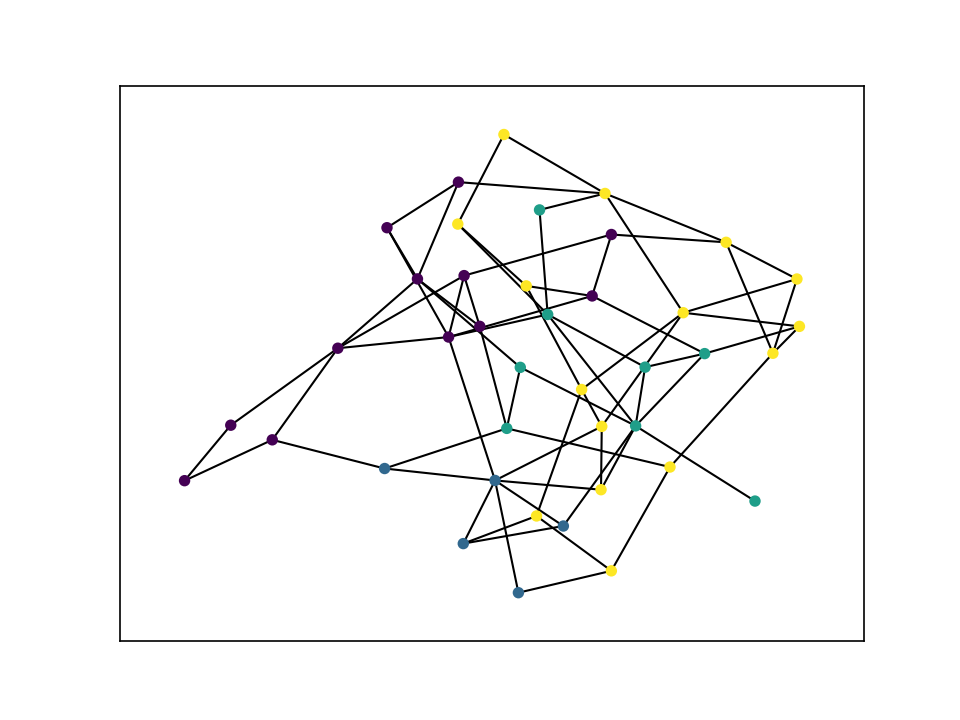

In [52]:
myOrbit.draw()

Just calling myOrbit.draw() will draw the last frame in the orbit. However, if we have a two cycle we may want to draw the last two frames side by side. We can do this as well. 

To ensure we get a 2 cycle, we will use a complete bipartite with a carefully selected initial condition.

<IPython.core.display.Javascript object>


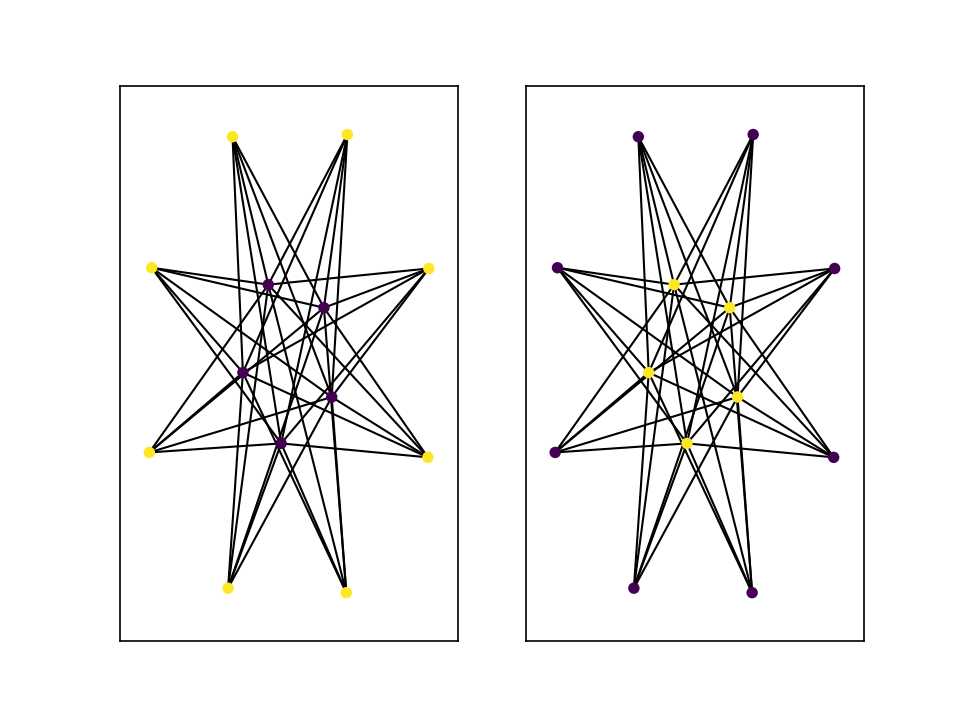

In [53]:
n1 = 8
n2 = 5
y0=(1,)*n1+(2,)*n2
myNewOrbit = orbit.Orbit(nx.complete_bipartite_graph(n1,n2),y0)

myNewOrbit.draw(2)

you can also change the dimensions of the subplots in the draw() method by passing a tuple of dimensions

<IPython.core.display.Javascript object>


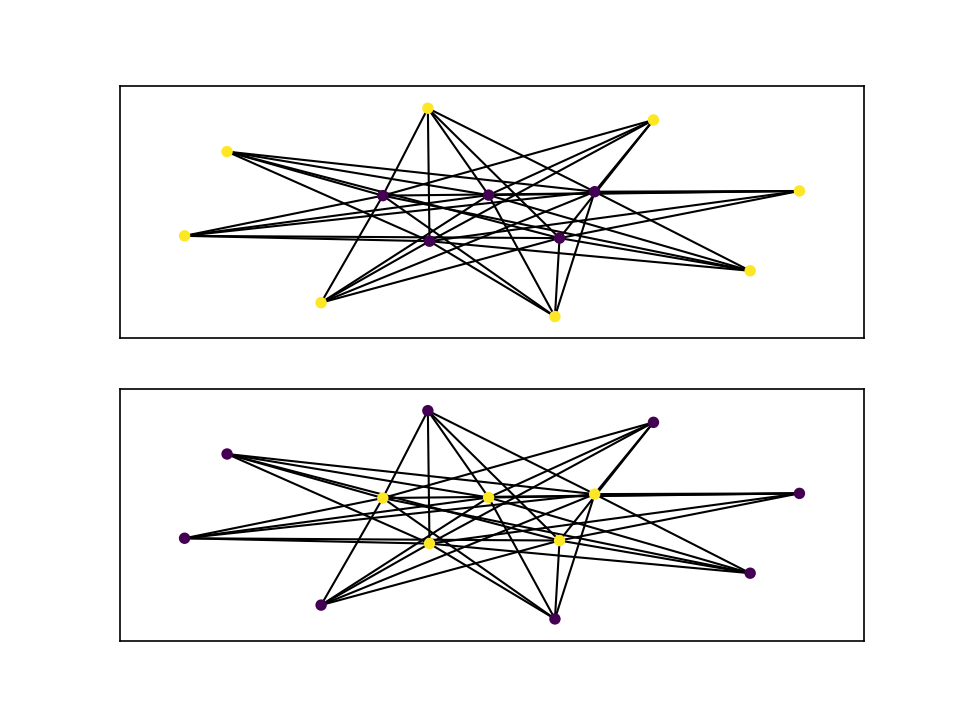

In [54]:
myNewOrbit.draw(2,(2,1))

We can also visualize these orbits as they evolve through time by using the animation() method of the Orbit class. To illustrate this lets make a third orbit starting from a random graph and the default initial condition

<IPython.core.display.Javascript object>


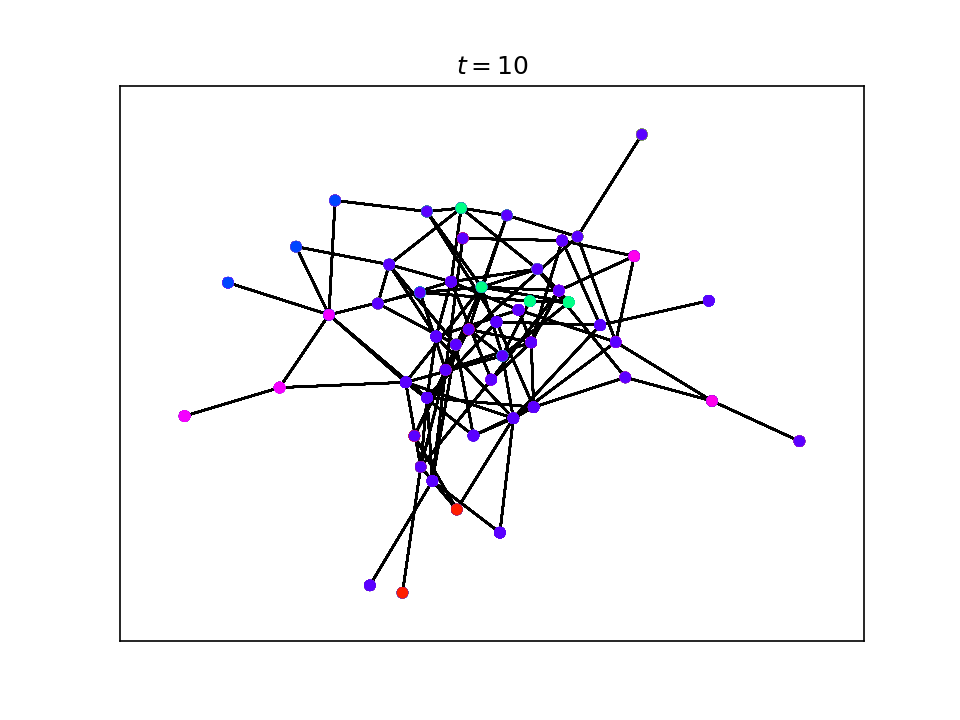

In [55]:
myThirdOrbit = orbit.Orbit(GTDS_equilibria.gen_connected_graph(50,0.08))
myThirdOrbit.animation()

## Tools for Analysis of the System
The main tool in understanding equilibria of this system is by describing cliques: connected subgraphs wherein every vertex is the same color. The function find_cliques() takes the limit of an orbit and finds its cliques. Below I show the limit of myThirdOrbit and dertermine how many cliques it has. 

<IPython.core.display.Javascript object>


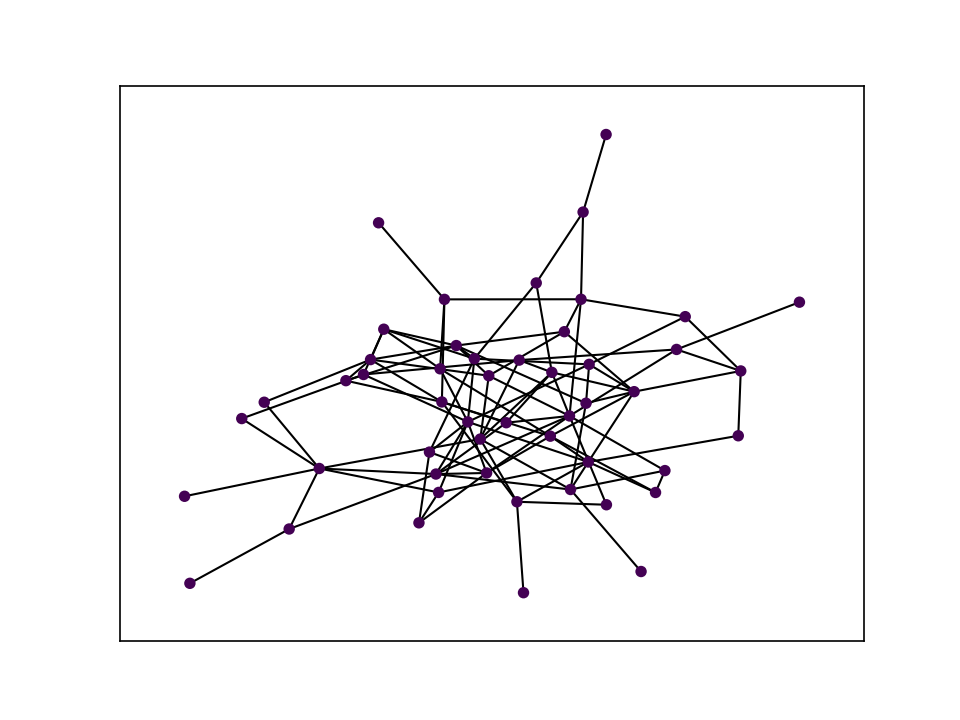

myThirdOrbit has 1 cliques in its limit


In [56]:
if myThirdOrbit.eq:
    myThirdOrbit.draw()
else:
    myThirdOrbit.draw(2)
    
cliques = GTDS_equilibria.find_cliques(myThirdOrbit)
print("myThirdOrbit has {} cliques in its limit".format(len(cliques)))

All of these tools will be essential in the analysis of this system. To make things easier in the future, the class Orbit is well documented with docstrings

In [57]:
help(orbit.Orbit)

Help on class Orbit in module orbit:

class Orbit(builtins.object)
 |  Orbit(G, y0=None, iter_limit=5000)
 |  
 |  A solution to the IVP for the GTDS
 |  
 |  
 |  Attributes
 |  ----------
 |      graph : nx.Graph
 |          the graph on which the IVP is solved 
 |      solution : list 
 |          a sequence of colorings, colors are represented as integers
 |      iter : int
 |          The length of the solution
 |      eq : bool
 |          True if the solution ends in an equilibrium
 |      cycle2 : bool
 |          True if the solution ends in a two-cycle
 |      cycle3 : bool
 |          True if the solution ends in a three-cycle
 |      report : str
 |          A string which describes the solution and its limit. 
 |  Methods
 |  ---------
 |      draw(n=1, dim=None)
 |          Shows a figure with the final n steps of orbit colored on the graph
 |      get_limit()
 |          Returns the last coloring in the orbit it the orbit ends in an equilibrium,
 |          the last two 

These orbit objects are very beautiful. Play around with the parameters of the graphs to see how the orbit behave differently

Starting from a given coloring of a connected graph on 80 vertices, the orbit terminated in 54 iterations. The orbit ended in a 2 cycle
This orbit ends in a limit with 3 cliques


<IPython.core.display.Javascript object>


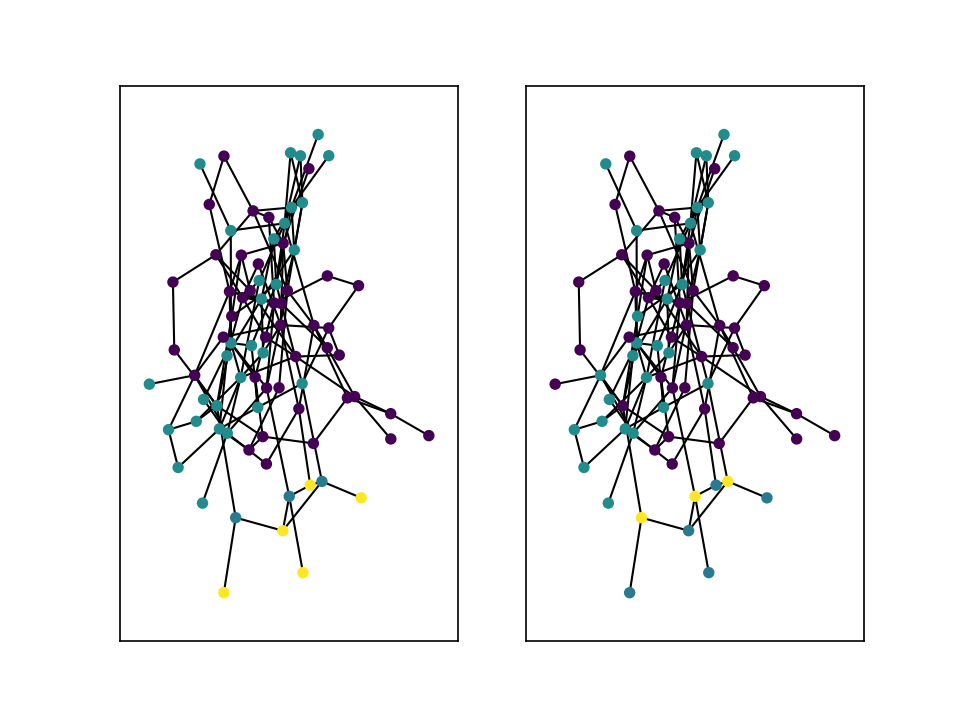

In [48]:
G = GTDS_equilibria.gen_connected_graph(80,0.04)
newOrbit = orbit.Orbit(G)
print(newOrbit)
ncliques = len(GTDS_equilibria.find_cliques(newOrbit))
print("This orbit ends in a limit with {} cliques".format(ncliques))
if newOrbit.eq:
    newOrbit.draw()
elif newOrbit.cycle2:
    newOrbit.draw(2)
elif newOrbit.cycle3:
    newOrbit.draw(3)
else:
    newOrbit.draw(4)
    print("No small limit cycle or equilibrium was found")